In [4]:
#################################
#Guassian and line fitting
#By Alexandra Higley
#################################

import numpy as np
from scipy.optimize import curve_fit
from pylab import *
from math import e
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
from scipy import stats
from scipy.stats import norm

BIN EDGES:  [16.1  16.48 16.86 17.24 17.62]
BIN CENTERS:  [16.29 16.67 17.05 17.43 17.81]
COUNTS:  [1 2 8 5 2]


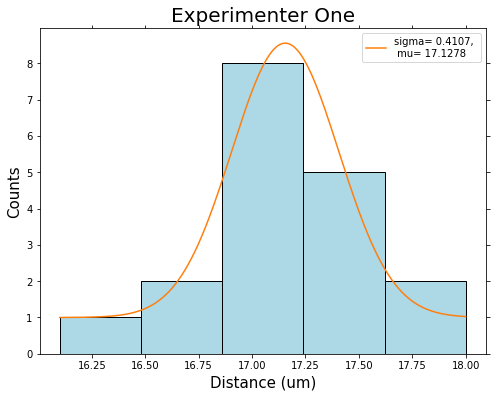

In [5]:
#Example One, Histogram that actually works

data1 = (17.2,17.7,18,16.9,17,17.3,17.4,17.1,16.6,17.2,16.1,17.3,17,17,17.5,17.3,16.7,17)
#array of data

counts1,bins1 = np.histogram(data1, bins=5)
#making counts and bins
mu1, sigma1 = scipy.stats.norm.fit(data1)
#easy way to find mu and sigma, but not necessary

binmid1 = np.zeros(5,dtype='f4')
for i in range(5):
    binmid1[i] = (bins1[i+1]+bins1[i])/2.0
#for a histogram, you want to find the midpoint on the bins
#You want to fit it to the midpoint. for loop to find
#midpoints.

#***Note that the range is how many bins you want and the
#length of the new array for the midpoint is also the length
#of how many bins you want

print('BIN EDGES: ', bins1[:-1])
#:-1 because there is one more bin edge than count
#you want all bin edges but last
print('BIN CENTERS: ', binmid1)
print('COUNTS: ', counts1)


def line1(x,a1,mu,sig):
    y1 = 1 + a1*e**((-(x-mu)**2)/(2*sig**2))
    return y1

def line2(x,a,b):
    y2 = a*(b**x)
    return y2

def line3(x,m,b):
    y3 = m*x + b
    return y3


#Defining different types of lines.
#line1 - gaussian
#line2 - exponential
#line3 - linear
#More can be added if need be

p1= np.array([1,0,10])
#an array of what we think the variables will be for the gaussian
#[a1,mu,sig]
#it's not always necessary but if you are getting lines when
#you don't think there should be or if you're getting a parameter-related
#error, it's probably because you don't have this or the numbers in it aren't
#good enough guesses

popt1, pcov1 = curve_fit(line1, binmid1, counts1, p0=p1)
#calling curve_fit. if you are fitting something that isn't gaussian,
#you need to take p0=p1 out.

xarr1 = np.linspace(np.min(data1),np.max(data1), 1000)
#making an array of a lot of data points between min/max of the data
#the more you have the more clear the gaussian will be

yarr1 = line1(xarr1, *popt1)
#calling function that defined whatever line you are fitting

#Also, when this does plot, it won't go down to zero. That's because
#There is no "zero data." Talking around, I don't think this matters
#But if you really want to, you can fix it by either zeroing the xdata
#or adding two more adjacent points on either side of the histogram
#with y coordinates of zero.


#I use object-oriented plotting instead of the regular way which lets you 
#have way more control over how your plots look. 

fig1,ax1 =plt.subplots(figsize=(8,6))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax1.hist(bins1[:-1],bins1, edgecolor='black', facecolor='lightblue',weights=counts1)
ax1.plot(xarr1,yarr1)

ax1.set_xlabel('Distance (um)',fontsize=15)
ax1.set_ylabel('Counts',fontsize=15)

ax1.tick_params(axis='both',which='minor',direction='in')
ax1.tick_params(top=True,right=True)
ax1.tick_params(which='minor',top=True,right=True)

ax1.set_title("Experimenter One", fontsize = 20)
plt.legend(["sigma= {}, \n mu= {}".format(round(sigma1,4),round(mu1,4))])
#plt.legend()
plt.show()



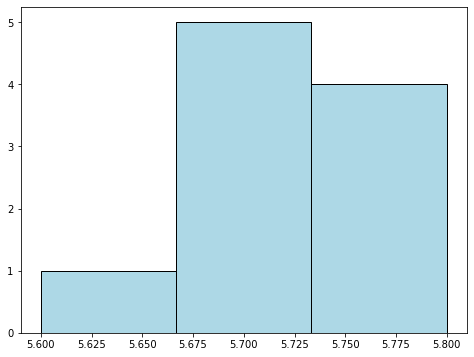

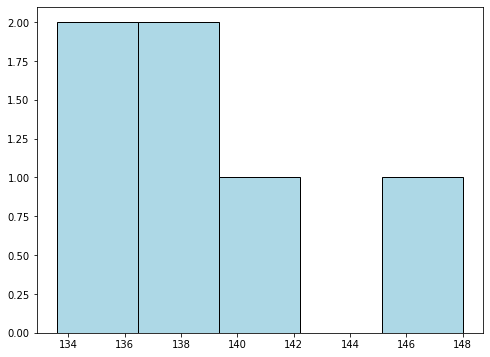

In [6]:
#################################
#Example Two, Histograms that won't work

data2 = (5.7,5.7,5.6,5.7,5.8,5.8,5.7,5.8,5.7,5.8)
data3 = (148,136,133.6,138.4,137.2,141)

counts2,bins2 = np.histogram(data2, bins=3)
mu2, sigma2 = scipy.stats.norm.fit(data2)
#It's kinda stupid to try to fit a gaussian to three points
#I know that orgin will do it but I'm not sure that's a good thing.
#After speaking to Ebie I don't think that it is a good conclusion to come
#to that your data is "gaussian" if you only have three unique values
#If there are only 3 points, it could be anything. In this case,
#I said the data was bad/ not diverse, but it's open to interpretation

counts3,bins3 = np.histogram(data3, bins=5)
mu3, sigma3 = scipy.stats.norm.fit(data3)
#Fot this one, the data kind sucks like the other histogram (thanks rudi),
#but also it's just not gaussian.

fig2,ax2 =plt.subplots(figsize=(8,6))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax2.hist(bins2[:-1],bins2, edgecolor='black', facecolor='lightblue',weights=counts2)
plt.show()

fig3,ax3 =plt.subplots(figsize=(8,6))
#ax2.hist(bins[:-1],bins, edgecolor='black', facecolor='cornflowerblue',weights=counts)
ax3.hist(bins3[:-1],bins3, edgecolor='black', facecolor='lightblue',weights=counts3)
plt.show()



/Users/alexh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in power


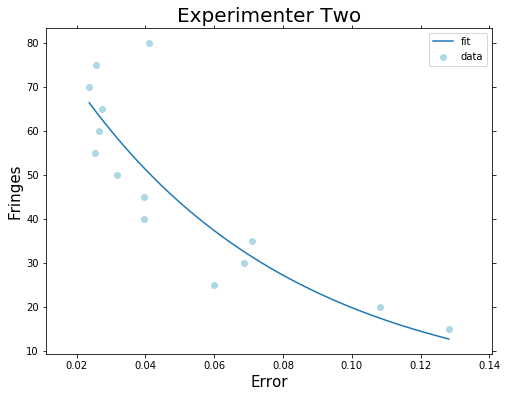

In [7]:
#################################
#Example Three, fitting to scatter plots

error = (0.1282,0.1083,0.0601,0.0688,0.0711,0.0396,0.0397,0.0317,0.0255,0.0264,0.0274,0.0237,0.0256,0.0410)
fringe = (15,20,25,30,35,40,45,50,55,60,65,70,75,80)

popt4, pcov4 = curve_fit(line2, error, fringe)
#Using line2 (exponential line) now
#(function, xdata, ydata)
xarr4 = np.linspace(np.min(error),np.max(error), 1000)
yarr4 = line2(xarr4, *popt4)
#again, calling line2


fig4,ax4 =plt.subplots(figsize=(8,6))

ax4.scatter(error,fringe, color='lightblue', label="data")
ax4.plot(xarr4,yarr4,label="fit")

ax4.set_xlabel('Error',fontsize=15)
ax4.set_ylabel('Fringes',fontsize=15)

ax4.tick_params(axis='both',which='minor',direction='in')
ax4.tick_params(top=True,right=True)
ax4.tick_params(which='minor',top=True,right=True)

ax4.set_title("Experimenter Two", fontsize = 20)

plt.legend()
plt.show()
